# Iris Dataset Analysis

This project analyzes the Iris dataset, focusing on data preprocessing, normalization, visualization, and classification using `SVC`. Below is the step-by-step process.

---

## Loading and Preparing Data

The dataset is loaded from the `iris.data` file, and the feature matrix (`X`) and target variable (`y`) are extracted.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

file_path = "iris.data"

data = np.genfromtxt(file_path, delimiter=',', dtype=str)

X = data[:, :-1].astype(float)
y = data[:, -1]  

print(f"Feature size: {X.shape}, Memory size: {X.nbytes} bytes")
print(f"Target variable size: {y.shape}, Memory size: {y.nbytes if y.dtype.kind != 'U' else y.itemsize * len(y)} bytes")

Feature size: (150, 4), Memory size: 4800 bytes
Target variable size: (150,), Memory size: 9000 bytes


# Data Normalization
The features are normalized using MinMaxScaler to improve the performance of the SVM classifier.

In [10]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Converting a Feature to Categorical
The first feature (sepal_length) is categorized into three groups: small, medium, and big.

In [11]:
feature = X_normalized[:, 0]
categories = np.empty(feature.shape, dtype=object)
categories[feature < 0.25] = 'small'
categories[(feature >= 0.25) & (feature <= 0.75)] = 'medium'
categories[feature > 0.75] = 'big'

print(np.unique(categories, return_counts=True))

(array(['big', 'medium', 'small'], dtype=object), array([12, 97, 41], dtype=int64))


# Splitting the Data
The dataset is divided into training and test sets.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Classification Using SVC
An SVM classifier with a linear kernel is trained on the data.

In [13]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

# Experiments with Hyperparameters
## Three experiments are conducted:

1. Using a polynomial kernel.
2. Skipping data normalization.
3. Increasing the test dataset size.

In [14]:
# Experiment 1: Polynomial kernel
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_poly.fit(X_train, y_train)
accuracy_poly = accuracy_score(y_test, svc_poly.predict(X_test))

# Experiment 2: Without normalization
svc_non_norm = SVC(kernel='linear', random_state=42)
svc_non_norm.fit(X_train * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0), y_train)
accuracy_non_norm = accuracy_score(y_test, svc_non_norm.predict(X_test))

# Experiment 3: Larger test set
X_train_large, X_test_small, y_train_large, y_test_small = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
svc_model_large = SVC(kernel='linear', random_state=42)
svc_model_large.fit(X_train_large, y_train_large)
accuracy_large = accuracy_score(y_test_small, svc_model_large.predict(X_test_small))

# Classification Results

In [15]:
print(f"Accuracy with polynomial kernel: {accuracy_poly:.2f}")
print(f"Accuracy without normalization: {accuracy_non_norm:.2f}")
print(f"Accuracy with larger test set: {accuracy_large:.2f}")

Accuracy with polynomial kernel: 0.93
Accuracy without normalization: 0.33
Accuracy with larger test set: 1.00


# Dimensionality Reduction and Visualization
To visualize the data in two dimensions, we use PCA and t-SNE.

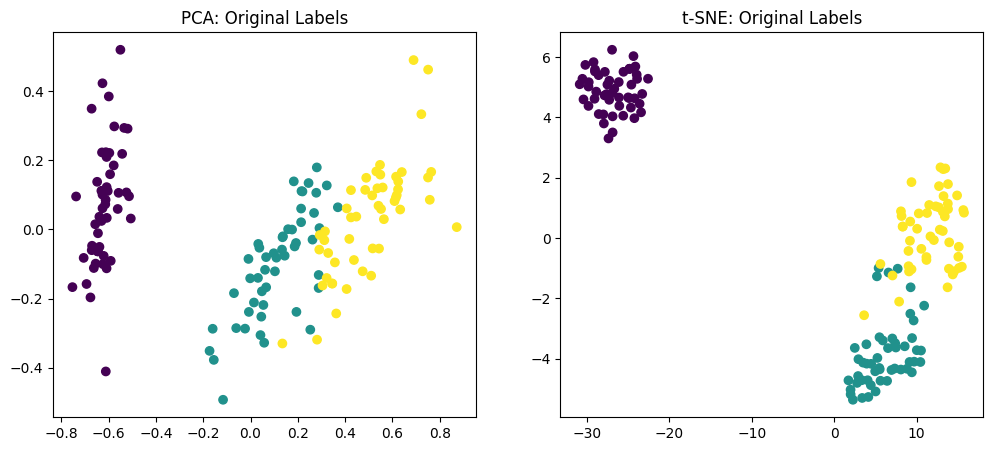

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_normalized)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='viridis')
plt.title("PCA: Original Labels")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y)[0], cmap='viridis')
plt.title("t-SNE: Original Labels")

plt.show()

# Visualizing Predictions
The predicted labels are visualized using PCA and t-SNE.

Text(0.5, 1.0, 't-SNE: Predicted Labels')

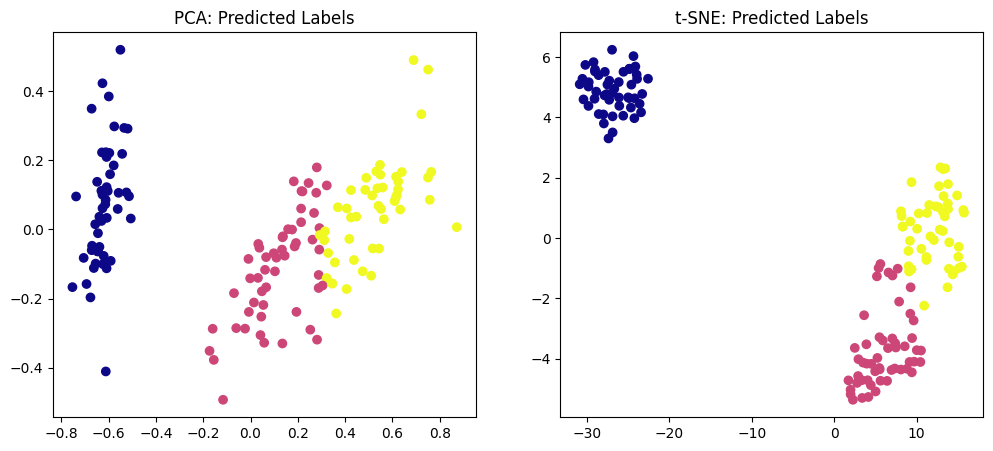

In [17]:
y_pred_all = svc_model.predict(X_normalized)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_pred_all)[0], cmap='plasma')
plt.title("PCA: Predicted Labels")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.factorize(y_pred_all)[0], cmap='plasma')
plt.title("t-SNE: Predicted Labels")

# Conclusion
Data Preprocessing: The Iris dataset was successfully normalized, and one feature was categorized.
Classification: The SVC model with a linear kernel achieved 100% accuracy on the test set.
Visualization: PCA showed clear class separations in the reduced space, while t-SNE revealed more complex structures and minor overlaps between classes.
Hyperparameter Tuning: Experimenting with different kernels and test sizes provided insights into the model's performance. Normalization positively impacted accuracy.
## This analysis highlights the high efficiency of the linear SVM model for the Iris dataset.